In [1]:
import tensorflow as tf

#在处理包含大量零值的张量时，以节省空间和时间的方式存储它们非常重要。
#稀疏张量可以有效地存储和处理包含大量零值的张量。

In [ ]:
### 4.4.1 TensorFlow 中的稀疏张量

#TensorFlow通过tf.sparse.SparseTensor对象表示稀疏张量。
#目前，TensorFlow 中的稀疏张量使用coordinate list (COO)格式进行编码。
#此编码格式针对超稀疏矩阵（如嵌入）进行了优化。

#稀疏张量的 COO 编码由以下部分组成：
#   values：shape为N的包含所有非零值的一维张量。
#   indices：具有形状为[N, rank]的二维张量，包含非零值的索引。
#   dense_shape：具有形状为[rank]的一维张量，指定张量的形状。

In [3]:
### 4.4.2 创建tf.sparse.SparseTensor
st1 = tf.sparse.SparseTensor(
    indices=[[0,3],[2,4]],
    values=[10,20],
    dense_shape=[3,10]
)
st1

SparseTensor(indices=tf.Tensor(
[[0 3]
 [2 4]], shape=(2, 2), dtype=int64), values=tf.Tensor([10 20], shape=(2,), dtype=int32), dense_shape=tf.Tensor([ 3 10], shape=(2,), dtype=int64))

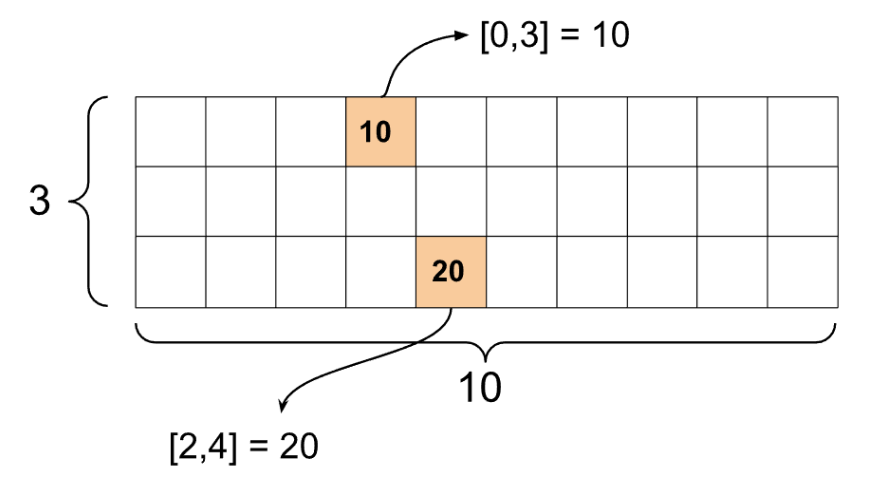

In [7]:
#您还可以使用tf.sparse.from_dense从密集张量构造稀疏张量，
#并使用tf.sparse.to_dense将它们转换回密集张量。
st2 = tf.sparse.from_dense([[1,0,0,8],[0,0,0,0],[0,0,3,0]])
st2

SparseTensor(indices=tf.Tensor(
[[0 0]
 [0 3]
 [2 2]], shape=(3, 2), dtype=int64), values=tf.Tensor([1 8 3], shape=(3,), dtype=int32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))

In [8]:
st3 = tf.sparse.to_dense(st2)
st3

<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[1, 0, 0, 8],
       [0, 0, 0, 0],
       [0, 0, 3, 0]])>

In [10]:
### 4.4.3 操作稀疏张量
#使用tf.sparse包来操作稀疏张量。像 tf.math.add 这样的操作可用于密集张量算术运算，不适用于稀疏张量。

#使用tf.sparse.add计算具有相同形状的稀疏张量。
st_a = tf.sparse.SparseTensor(indices=[[0, 2], [3, 4]],
                       values=[31, 2], 
                       dense_shape=[4, 10])

st_b = tf.sparse.SparseTensor(indices=[[0, 2], [7, 0]],
                       values=[56, 38],
                       dense_shape=[4, 10])

st_sum = tf.sparse.add(st_a, st_b)

st_sum

SparseTensor(indices=tf.Tensor(
[[0 2]
 [3 4]
 [7 0]], shape=(3, 2), dtype=int64), values=tf.Tensor([87  2 38], shape=(3,), dtype=int32), dense_shape=tf.Tensor([ 4 10], shape=(2,), dtype=int64))

In [11]:
##使用tf.sparse.sparse_dense_matmul将稀疏张量与密集矩阵相乘。
st_c = tf.sparse.SparseTensor(indices=([0, 1], [1, 0], [1, 1]),
                       values=[13, 15, 17],
                       dense_shape=(2,2))

mb = tf.constant([[4], [6]])
product = tf.sparse.sparse_dense_matmul(st_c, mb)
product

<tf.Tensor: shape=(2, 1), dtype=int32, numpy=
array([[ 78],
       [162]])>

In [12]:
#使用tf.sparse.concat 将稀疏张量拼接在一起
sparse_pattern_A = tf.sparse.SparseTensor(indices = [[2,4], [3,3], [3,4], [4,3], [4,4], [5,4]],
                         values = [1,1,1,1,1,1],
                         dense_shape = [8,5])
sparse_pattern_B = tf.sparse.SparseTensor(indices = [[0,2], [1,1], [1,3], [2,0], [2,4], [2,5], [3,5], 
                                              [4,5], [5,0], [5,4], [5,5], [6,1], [6,3], [7,2]],
                         values = [1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                         dense_shape = [8,6])
sparse_pattern_C = tf.sparse.SparseTensor(indices = [[3,0], [4,0]],
                         values = [1,1],
                         dense_shape = [8,6])

sparse_patterns_list = [sparse_pattern_A, sparse_pattern_B, sparse_pattern_C]
sparse_pattern = tf.sparse.concat(axis=1, sp_inputs=sparse_patterns_list)
tf.sparse.to_dense(sparse_pattern)

<tf.Tensor: shape=(8, 17), dtype=int32, numpy=
array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])>

In [14]:
#使用tf.sparse.slice拆分稀疏张量
sparse_slice_A = tf.sparse.slice(sparse_pattern_A, start = [0,0], size = [8,5])
sparse_slice_B = tf.sparse.slice(sparse_pattern_B, start = [0,5], size = [8,6])
sparse_slice_C = tf.sparse.slice(sparse_pattern_C, start = [0,10], size = [8,6])
print(tf.sparse.to_dense(sparse_slice_A),'\n')
print(tf.sparse.to_dense(sparse_slice_B),'\n')
print(tf.sparse.to_dense(sparse_slice_C))

tf.Tensor(
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 1]
 [0 0 0 1 1]
 [0 0 0 1 1]
 [0 0 0 0 1]
 [0 0 0 0 0]
 [0 0 0 0 0]], shape=(8, 5), dtype=int32) 

tf.Tensor(
[[0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]], shape=(8, 1), dtype=int32) 

tf.Tensor([], shape=(8, 0), dtype=int32)


In [20]:
### 4.4.4 与其他 TensorFlow API 配合使用
## 1 tf.keras
x = tf.keras.Input(shape=(4,), sparse=True)
y = tf.keras.layers.Dense(4)(x)
model = tf.keras.Model(x, y)

sparse_data = tf.sparse.SparseTensor(
    indices = [(0,0),(0,1),(0,2),
               (4,3),(5,0),(5,1)],
    values = [1,1,1,1,1,1],
    dense_shape = (6,4)
)

model(sparse_data) 
model.predict(sparse_data)


1/1 [==============================] - 0s 74ms/step


array([[ 0.34451646, -1.542771  , -1.0551944 ,  0.1038233 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [-0.76079667, -0.5937338 ,  0.14296907, -0.5094815 ],
       [ 0.06693244, -1.1320031 , -0.7351746 , -0.540857  ]],
      dtype=float32)

In [33]:
## 2 tf.data
##使用稀疏张量构建数据集
#使用 tf.Tensor或 NumPy 数组从稀疏张量构建数据集构建数据集的方法相同，
#例如 tf.data.Dataset.from_tensor_slices 。此操作保留了数据的稀疏性（或稀疏性）。
dataset = tf.data.Dataset.from_tensor_slices(sparse_data)
for index, element in enumerate(dataset): 
  print("element:",index ,element,'\n')

element: 0 SparseTensor(indices=tf.Tensor(
[[0]
 [1]
 [2]], shape=(3, 1), dtype=int64), values=tf.Tensor([1 1 1], shape=(3,), dtype=int32), dense_shape=tf.Tensor([4], shape=(1,), dtype=int64)) 

element: 1 SparseTensor(indices=tf.Tensor([], shape=(0, 1), dtype=int64), values=tf.Tensor([], shape=(0,), dtype=int32), dense_shape=tf.Tensor([4], shape=(1,), dtype=int64)) 

element: 2 SparseTensor(indices=tf.Tensor([], shape=(0, 1), dtype=int64), values=tf.Tensor([], shape=(0,), dtype=int32), dense_shape=tf.Tensor([4], shape=(1,), dtype=int64)) 

element: 3 SparseTensor(indices=tf.Tensor([], shape=(0, 1), dtype=int64), values=tf.Tensor([], shape=(0,), dtype=int32), dense_shape=tf.Tensor([4], shape=(1,), dtype=int64)) 

element: 4 SparseTensor(indices=tf.Tensor([[3]], shape=(1, 1), dtype=int64), values=tf.Tensor([1], shape=(1,), dtype=int32), dense_shape=tf.Tensor([4], shape=(1,), dtype=int64)) 

element: 5 SparseTensor(indices=tf.Tensor(
[[0]
 [1]], shape=(2, 1), dtype=int64), values=tf.Tens

In [32]:
##使用稀疏张量对数据集进行批处理和取消批处理
#您可以分别使用Dataset.batch和Dataset.unbatch方法进行批处理（将连续元素组合成单个元素）和取消批处理具有稀疏张量的数据集。
batched_dataset = dataset.batch(2)
for index, element in enumerate(batched_dataset): 
  print("element:",index ,element,'\n')

element: 0 SparseTensor(indices=tf.Tensor(
[[0 0]
 [0 1]
 [0 2]], shape=(3, 2), dtype=int64), values=tf.Tensor([1 1 1], shape=(3,), dtype=int32), dense_shape=tf.Tensor([2 4], shape=(2,), dtype=int64)) 

element: 1 SparseTensor(indices=tf.Tensor([], shape=(0, 2), dtype=int64), values=tf.Tensor([], shape=(0,), dtype=int32), dense_shape=tf.Tensor([2 4], shape=(2,), dtype=int64)) 

element: 2 SparseTensor(indices=tf.Tensor(
[[0 3]
 [1 0]
 [1 1]], shape=(3, 2), dtype=int64), values=tf.Tensor([1 1 1], shape=(3,), dtype=int32), dense_shape=tf.Tensor([2 4], shape=(2,), dtype=int64)) 



In [34]:
unbatched_dataset = batched_dataset.unbatch()
for index, element in enumerate(unbatched_dataset): 
  print("element:",index ,element,'\n')

element: 0 SparseTensor(indices=tf.Tensor(
[[0]
 [1]
 [2]], shape=(3, 1), dtype=int64), values=tf.Tensor([1 1 1], shape=(3,), dtype=int32), dense_shape=tf.Tensor([4], shape=(1,), dtype=int64)) 

element: 1 SparseTensor(indices=tf.Tensor([], shape=(0, 1), dtype=int64), values=tf.Tensor([], shape=(0,), dtype=int32), dense_shape=tf.Tensor([4], shape=(1,), dtype=int64)) 

element: 2 SparseTensor(indices=tf.Tensor([], shape=(0, 1), dtype=int64), values=tf.Tensor([], shape=(0,), dtype=int32), dense_shape=tf.Tensor([4], shape=(1,), dtype=int64)) 

element: 3 SparseTensor(indices=tf.Tensor([], shape=(0, 1), dtype=int64), values=tf.Tensor([], shape=(0,), dtype=int32), dense_shape=tf.Tensor([4], shape=(1,), dtype=int64)) 

element: 4 SparseTensor(indices=tf.Tensor([[3]], shape=(1, 1), dtype=int64), values=tf.Tensor([1], shape=(1,), dtype=int32), dense_shape=tf.Tensor([4], shape=(1,), dtype=int64)) 

element: 5 SparseTensor(indices=tf.Tensor(
[[0]
 [1]], shape=(2, 1), dtype=int64), values=tf.Tens

In [36]:
##使用稀疏张量转换数据集
#使用Dataset.map在数据集中转换和创建稀疏张量。
transform_dataset = dataset.map(lambda x: x*2)
for index, element in enumerate(transform_dataset): 
  print("element:",index ,element,'\n')

element: 0 SparseTensor(indices=tf.Tensor(
[[0]
 [1]
 [2]], shape=(3, 1), dtype=int64), values=tf.Tensor([2 2 2], shape=(3,), dtype=int32), dense_shape=tf.Tensor([4], shape=(1,), dtype=int64)) 

element: 1 SparseTensor(indices=tf.Tensor([], shape=(0, 1), dtype=int64), values=tf.Tensor([], shape=(0,), dtype=int32), dense_shape=tf.Tensor([4], shape=(1,), dtype=int64)) 

element: 2 SparseTensor(indices=tf.Tensor([], shape=(0, 1), dtype=int64), values=tf.Tensor([], shape=(0,), dtype=int32), dense_shape=tf.Tensor([4], shape=(1,), dtype=int64)) 

element: 3 SparseTensor(indices=tf.Tensor([], shape=(0, 1), dtype=int64), values=tf.Tensor([], shape=(0,), dtype=int32), dense_shape=tf.Tensor([4], shape=(1,), dtype=int64)) 

element: 4 SparseTensor(indices=tf.Tensor([[3]], shape=(1, 1), dtype=int64), values=tf.Tensor([2], shape=(1,), dtype=int32), dense_shape=tf.Tensor([4], shape=(1,), dtype=int64)) 

element: 5 SparseTensor(indices=tf.Tensor(
[[0]
 [1]], shape=(2, 1), dtype=int64), values=tf.Tens

In [37]:
### 4.4.5 区分缺失值和零值
# tf.sparse.SparseTensors的大多数操作对待缺失值和显式零值的处理方式相同。
#这是经过设计的——一个tf.sparse.SparseTensor 的作用应该和稠密张量一样。
#然而，在少数情况下，区分零值和缺失值是有用的。

#请注意，某些运算（如tf.sparse.reduce_max ）不会将缺失值视为零。
#例如，当您运行下面的代码块时，预期的输出为0 。但是，由于此异常，输出为-3
print(tf.sparse.reduce_max(tf.sparse.from_dense([-5, 0, -3])))

tf.Tensor(-3, shape=(), dtype=int32)


In [38]:
#相反，当您对密集张量使用 tf.math.reduce_max时，输出如预期的那样为 0。
print(tf.math.reduce_max([-5, 0, -3]))

tf.Tensor(0, shape=(), dtype=int32)
